In [1]:
import numpy as np
import shapefile

import psycopg2

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
conn = psycopg2.connect("dbname='nyc_taxi' user='postgres' host='localhost' password='organon'")
cur = conn.cursor()

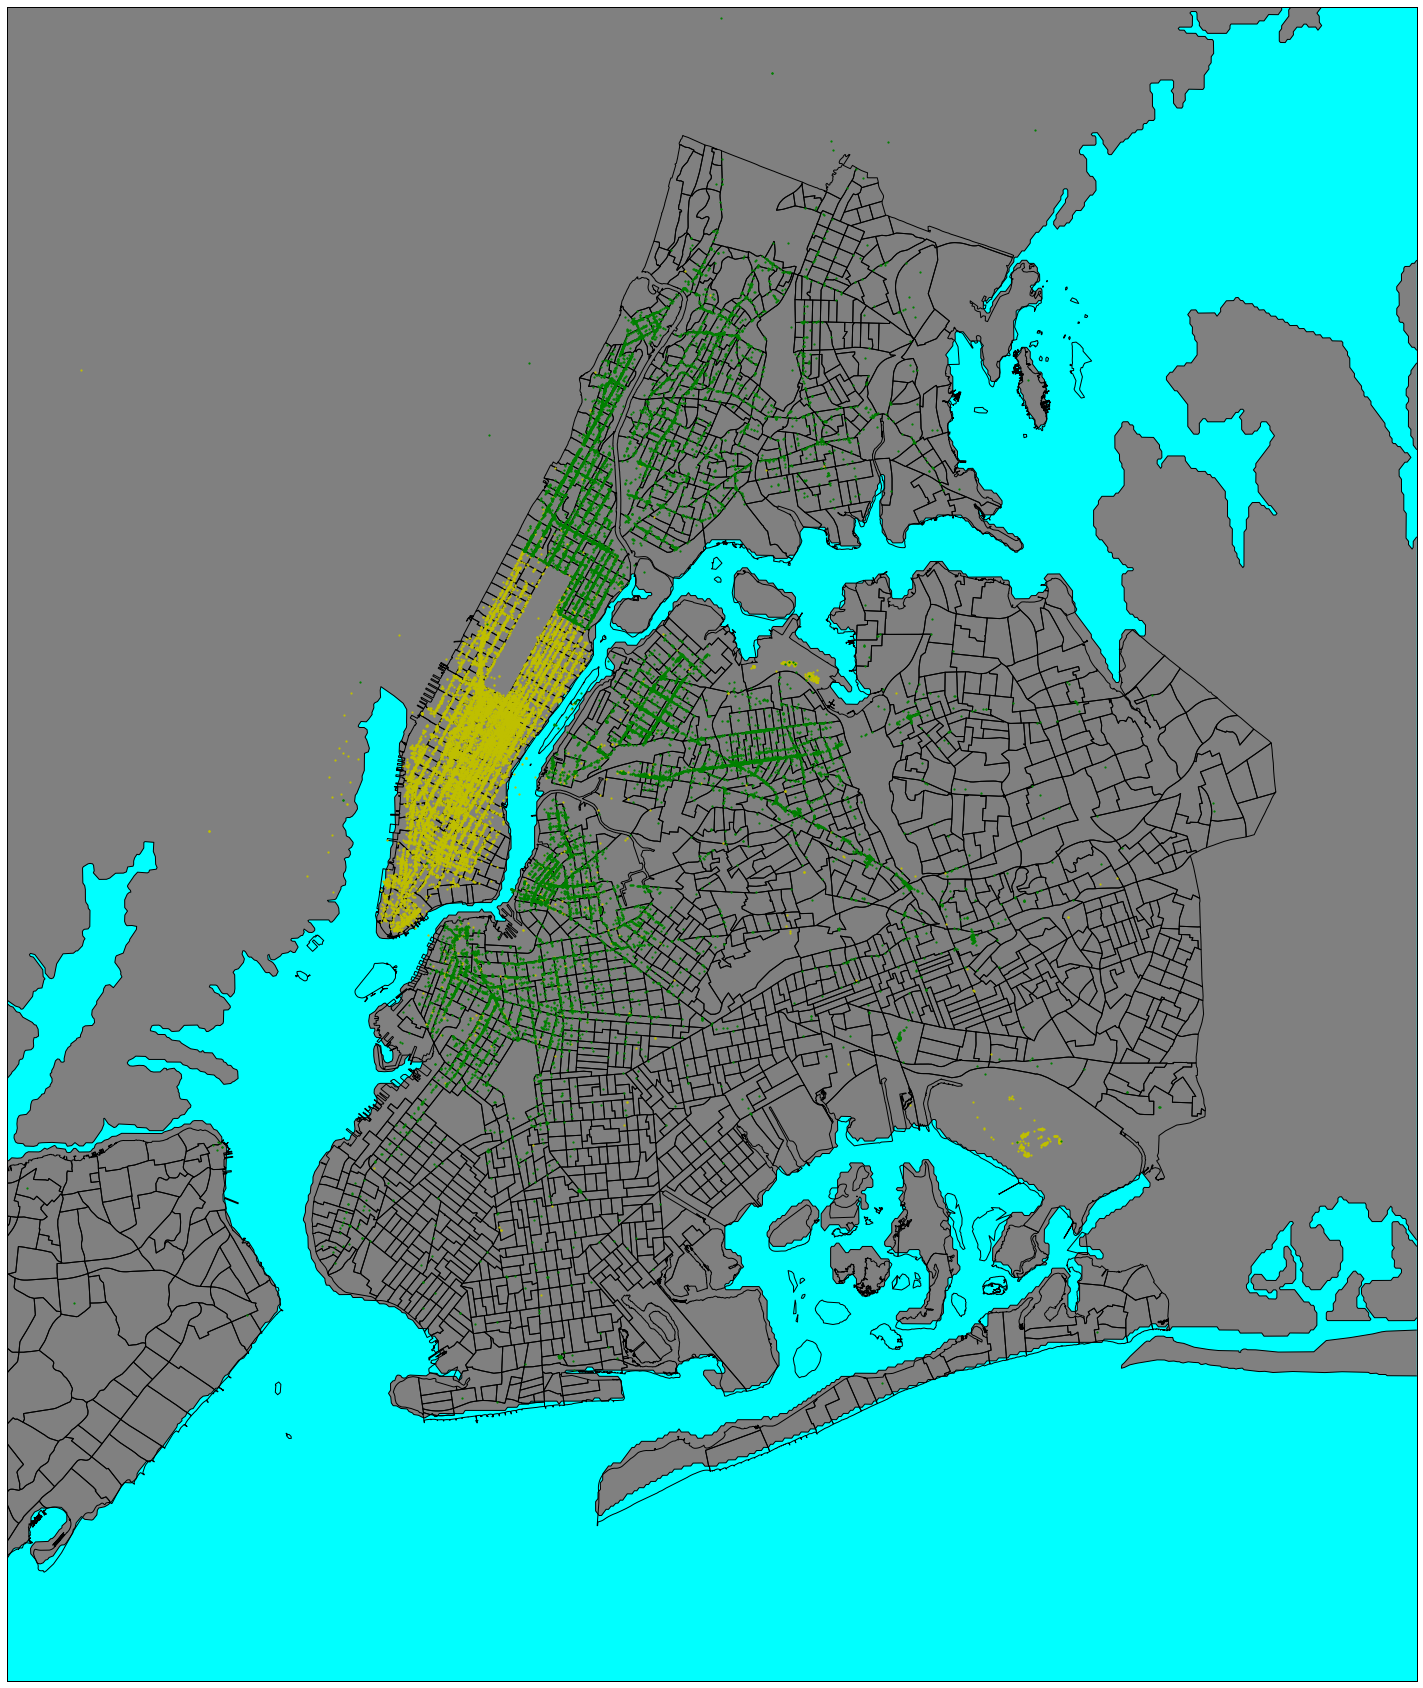

In [6]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)

west, south, east, north = -74.15, 40.50, -73.65, 40.95
m = Basemap(llcrnrlon=west,llcrnrlat=south,urcrnrlon=east, urcrnrlat=north,
             resolution='f', projection='merc', lat_0=(south+north)/2, lon_0=(west+east)/2)

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='grey',lake_color='aqua',zorder=0)
m.drawcoastlines()
m.drawrivers()

#m.readshapefile('./nta_2010/geo_export_d2bec86b-a3e8-4047-b785-24286f7718ab', 'nyc', linewidth=1, zorder=1) # NTA
m.readshapefile('./ct_2010/geo_export_670644cc-4c81-49e9-9d6d-fb574f649fff', 'nyc', linewidth=1, zorder=1) # Census tract

cur.execute("""SELECT ST_X(pickup_lonlat), ST_Y(pickup_lonlat) from trip WHERE is_yellow""")
pickup_lonlat = np.array(cur.fetchall())
x, y = m(pickup_lonlat[:, 0], pickup_lonlat[:, 1])
m.scatter(x, y, s=5, facecolor='y', lw = 0, zorder=2)

cur.execute("""SELECT ST_X(pickup_lonlat), ST_Y(pickup_lonlat) from trip WHERE NOT is_yellow""")
pickup_lonlat = np.array(cur.fetchall())
x, y = m(pickup_lonlat[:, 0], pickup_lonlat[:, 1])
m.scatter(x, y, s=5, facecolor='g', lw = 0, zorder=2)
# Color Clinton to magenta 
#patches = []
#for info, shape in zip(map.nyc_info, map.nyc):
#    if info['ntaname'] == 'Clinton':
#        patches.append(Polygon(np.array(shape), True))
#        
#ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))

# See [2013, Kelsey Jordahl] for more examples

In [ ]:
cur.close()

In [ ]:
sf = shapefile.Reader("./nta_2010/geo_export_d2bec86b-a3e8-4047-b785-24286f7718ab")
neighbors = sf.shapeRecords()
sf.fields

In [ ]:
neighbors = sf.shapeRecords()
neighbors[0].record, neighbors[0].shape

In [ ]:
# Try looking at the nta table from the database
# Query the data using plain SQL and plot the heatmap
conn = psycopg2.connect("dbname='nyc_taxi' user='postgres' host='localhost' password='organon'")
cur = conn.cursor()
cur.execute("""SELECT gid from nta""")
gid = np.array(cur.fetchall())

In [ ]:
cur.close()

In [ ]:
cur.execute("""SELECT gid from nta""")
gid = cur.fetchall()

cur.execute("""SELECT shape_area from nta""")
shape_area = cur.fetchall()

cur.execute("""SELECT ntacode from nta""")
ntacode = cur.fetchall()

cur.execute("""SELECT ntaname from nta""")
ntaname = cur.fetchall()

cur.execute("""SELECT shape_leng from nta""")
shape_leng = cur.fetchall()

cur.execute("""SELECT countyfips from nta""")
countyfips = cur.fetchall()

cur.execute("""SELECT borocode from nta""")
borocode = cur.fetchall()

cur.execute("""SELECT boroname from nta""")
boroname = cur.fetchall()

cur.execute("""SELECT geom from nta""")
geom = cur.fetchall()

In [ ]:
shape_area[0][0], ntacode[0][0], ntaname[0][0], shape_leng[0][0], countyfips[0][0], borocode[0][0], boroname[0][0], geom[0][0]

In [ ]:
shape_area[0][0] +1